In [44]:
import numpy as np
import math
import matplotlib.pyplot as plt
from calcul_structure import *

In [45]:
## Propriété materiaux [N, m]
E = 1
I = 1
A = 1

#Element 1
L=1

# Ligne Influence Moment flechissant en  E
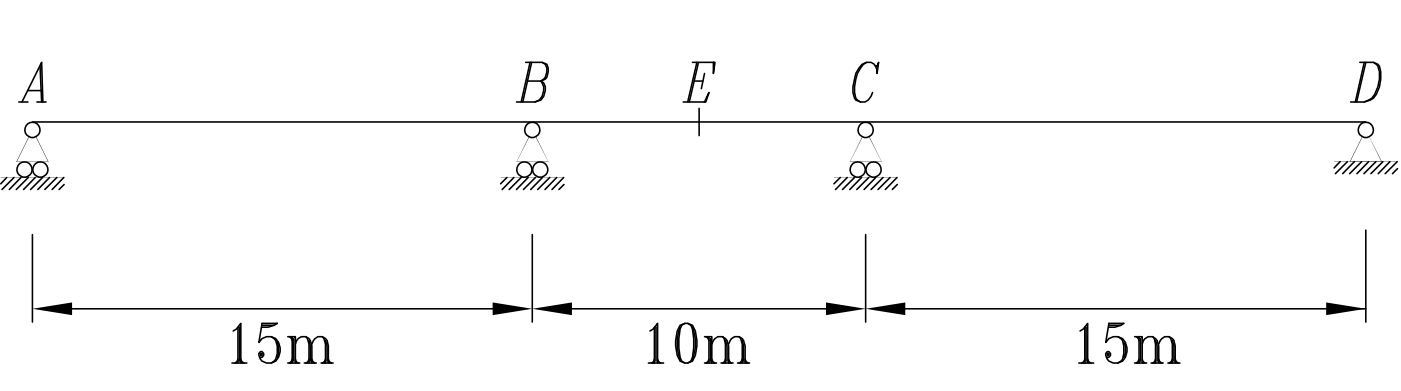

In [47]:
# Coordonnée éléments
XY = np.array([
     [0, 0], # Appui A
     [1, 0],
     [2, 0],
     [3, 0],
     [4, 0],
     [5, 0],
     [6, 0],
     [7, 0],
     [8, 0],
     [9, 0],
     [10,0],
     [11, 0],
     [12, 0],
     [13, 0],
     [14, 0],
     [15, 0], # Appui B
     [16, 0],
     [17, 0],
     [18, 0],
     [19, 0],
     [20,0], # Point E
     [20,0], # Point E
     [21,0],
     [22,0],
     [23,0],
     [24,0],
     [25,0], # Appui C
     [26,0],
     [27,0],
     [28,0],
     [29,0],
     [30,0],
     [31,0],
     [32,0],
     [33,0],
     [34,0],
     [35,0],
     [36,0],
     [37,0],
     [38,0],
     [39,0],
     [40,0], # Appui D
])

print(XY.shape)

(42, 2)


In [48]:
#Matrice de rigidité élémentaire en coordonnées locales
# Discretisation de la poutre en 8 element de longeur 5 m
mat_elem_local_1 = matrice_elementaire(E, I, A, L) # Matrice de rigidité Element 1

print(mat_elem_local_1)

[[  1.   0.   0.  -1.   0.   0.]
 [  0.  12.   6.   0. -12.   6.]
 [  0.   6.   4.   0.  -6.   2.]
 [ -1.   0.   0.   1.   0.   0.]
 [  0. -12.  -6.   0.  12.  -6.]
 [  0.   6.   2.   0.  -6.   4.]]


In [49]:
#Matrice de rotatio
rot_elem_1 = rotation_matrice(0) # Rotation Element 1

In [50]:
#Matrice de rigidité élémentaire en coordonnées locales
mat_elem_global_1 = np.matmul(np.matmul(np.transpose(rot_elem_1),mat_elem_local_1), rot_elem_1) # Matrice de rigidité Element 1

In [61]:
# Connection entre élément
# Degré de liberte de chaque élément de la forme
# LM[:, i] = [Uxi, Uyi, Thetai, Uxj, Uyj, Thetaj]
# Travée 1
LM = np.zeros((6, 41), dtype=int)
LM[:,0] = [0, 0, 38, 0, 1, 39]
LM[:,1] = [0, 1, 39, 0, 2, 40]    
LM[:,2] = [0, 2, 40, 0, 3, 41]   
LM[:,3] = [0, 3, 41, 0, 4, 42]
LM[:,4] = [0, 4, 42, 0, 5, 43]   
LM[:,5] = [0, 5, 43, 0, 6, 44]
LM[:,6] = [0, 6, 44, 0, 7, 45]
LM[:,7] = [0, 7, 45, 0, 8, 46]
LM[:,8] = [0, 8, 46, 0, 9, 47]
LM[:,9] = [0, 9, 47, 0, 10, 48]
LM[:,10] = [0, 10, 48, 0, 11, 49]
LM[:,11] = [0, 11, 49, 0, 12, 50]
LM[:,12] = [0, 12, 50, 0, 13, 51]
LM[:,13] = [0, 13, 51, 0, 14, 52]
LM[:,14] = [0, 14, 52, 0, 0, 53]

#Travée 2
LM[:,15] = [0, 0, 53, 0, 15, 54]
LM[:,16] = [0, 15, 54, 0, 16, 55]
LM[:,17] = [0, 16, 55, 0, 17, 56]
LM[:,18] = [0, 17, 56, 0, 18, 57]
LM[:,19] = [0, 18, 57, 0, 19, 58]
LM[:,20] = [0, 19, 58, 0, 20, 59]

LM[:,21] = [0, 20, 60, 0, 21, 61]
LM[:,22] = [0, 21, 61, 0, 22, 62]
LM[:,23] = [0, 22, 62, 0, 23, 63]
LM[:,24] = [0, 23, 63, 0, 0, 64]

#Travée 3
LM[:,25] = [0, 0, 64, 0, 24, 65]
LM[:,26] = [0, 24,65, 0, 25, 66]
LM[:,27] = [0, 25,66, 0, 26, 67]
LM[:,28] = [0, 26,67, 0, 27, 68]
LM[:,29] = [0, 27,68, 0, 28, 69]
LM[:,30] = [0, 28,69, 0, 29, 70]
LM[:,31] = [0, 29,70, 0, 30, 71]
LM[:,32] = [0, 30,71, 0, 31, 72]
LM[:,33] = [0, 31,72, 0, 32, 73]
LM[:,34] = [0, 32,73, 0, 33, 74]
LM[:,35] = [0, 33,74, 0, 34, 75]
LM[:,36] = [0, 34,75, 0, 35, 76]
LM[:,37] = [0, 35,76, 0, 36, 77]
LM[:,39] = [0, 36,77, 0, 37, 78]
LM[:,40] = [0, 37,78, 0, 0, 79]

print(LM)


[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14  0 15 16 17 18 19 20 21 22
  23  0 24 25 26 27 28 29 30 31 32 33 34 35  0 36 37]
 [38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 60 61 62
  63 64 65 66 67 68 69 70 71 72 73 74 75 76  0 77 78]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14  0 15 16 17 18 19 20 21 22 23
   0 24 25 26 27 28 29 30 31 32 33 34 35 36  0 37  0]
 [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 61 62 63
  64 65 66 67 68 69 70 71 72 73 74 75 76 77  0 78 79]]


In [62]:
# Assemblage de la matrice de rigidité
# Assemblage de la matrice de rigidité
K_global_2 = np.zeros((79, 79), dtype=np.float32)

for i in range(41):
    K_global_2 = assemblage_matrice_rigidite(LM, i, K_global_2, mat_elem_global_1)

print(K_global_2.shape)
np.linalg.inv(K_global_2)

(79, 79)


array([[ 3.724411  ,  6.699061  ,  8.840856  , ..., -0.40010062,
        -0.41700628, -0.42264152],
       [ 6.699061  , 12.564814  , 16.930616  , ..., -0.78948426,
        -0.8228428 , -0.83396226],
       [ 8.840856  , 16.930616  , 23.518188  , ..., -1.157434  ,
        -1.2063396 , -1.2226415 ],
       ...,
       [-0.40010062, -0.78948426, -1.157434  , ...,  3.0130315 ,
         2.9023144 ,  2.865409  ],
       [-0.41700628, -0.8228428 , -1.2063396 , ...,  2.9023144 ,
         3.7911446 ,  3.7540882 ],
       [-0.42264152, -0.83396226, -1.2226415 , ...,  2.865409  ,
         3.7540882 ,  4.716981  ]], dtype=float32)

In [63]:
#Vecteur de Force Nodale
P_global    = np.zeros(79)
P_global[58] = 1
P_global[59] = -1
print(P_global)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]


In [64]:
#Solution 
U = np.linalg.solve(K_global_2, P_global)
print(U[0:38])

[ -1.64360587  -3.24318658  -4.75471698  -6.13417191  -7.33752621
  -8.32075472  -9.03983229  -9.45073375  -9.50943396  -9.17190776
  -8.39412998  -7.13207547  -5.34171908  -2.97903564   3.64150943
   8.          13.13207547  19.09433962  25.94339623  33.73584906
  23.66037736  14.64150943   6.73584906  -5.53249476  -9.92033543
 -13.24528302 -15.58909853 -17.03354298 -17.66037736 -17.55136268
 -16.78825996 -15.45283019 -13.62683438 -11.39203354  -8.83018868
  -6.0230608   -3.0524109   -1.6509434 ]


In [66]:
# Line d'Influence Muller-Breslaut
M1 = U[58]
M2 = U[59]


LI  = U/(abs(M1) + abs(M2)) #changer le signe de M2 et M2 pour une somme en valeur absolue
print(LI)


[-0.08711111 -0.17188889 -0.252      -0.32511111 -0.38888889 -0.441
 -0.47911111 -0.50088889 -0.504      -0.48611111 -0.44488889 -0.378
 -0.28311111 -0.15788889  0.193       0.424       0.696       1.012
  1.375       1.788       1.254       0.776       0.357      -0.29322222
 -0.52577778 -0.702      -0.82622222 -0.90277778 -0.936      -0.93022222
 -0.88977778 -0.819      -0.72222222 -0.60377778 -0.468      -0.31922222
 -0.16177778 -0.0875     -0.08633333 -0.08283333 -0.077      -0.06883333
 -0.05833333 -0.0455     -0.03033333 -0.01283333  0.007       0.02916667
  0.05366667  0.0805      0.10966667  0.14116667  0.175       0.2115
  0.251       0.2935      0.339       0.3875      0.439      -0.561
 -0.5065     -0.449      -0.3885     -0.325      -0.26216667 -0.20366667
 -0.1495     -0.09966667 -0.05416667 -0.013       0.02383333  0.05633333
  0.0845      0.10833333  0.12783333  0.143       0.15383333  0.16033333
  0.1625    ]


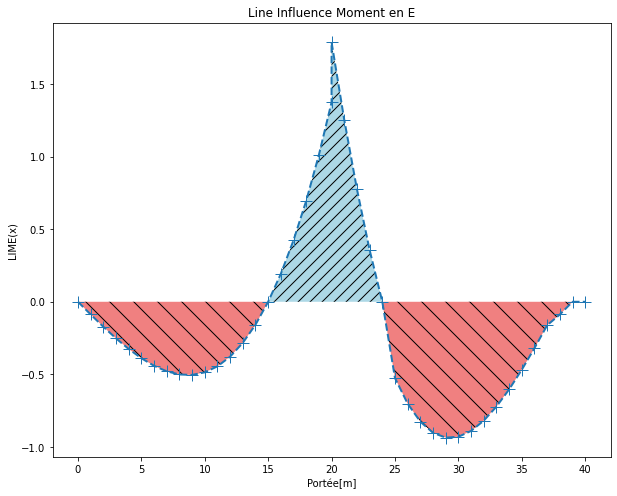

In [67]:
# Tracée ligne Influence
# Create the scatter plot
scale_factor = 1
x = scale_factor*XY[:, 0]
y = np.zeros((42,))
# Noeud 0, 1, 2
y[0]    = 0
y[1:15] = LI[0:14]
# Noeud 3 : Reaction appui, valeur deplacement vertical 0 
y[15] = 0
# Noeud 4 : Point E
y[16:25] = LI[14:23]
# # # Noeud 5, 6
y[25] = 0
y[26:40] = LI[24:38]
# # # Noeud 7 reaction appui 0
# y[41] = 0
# # print(y)

plt.figure(figsize=(10,8))
plt.plot(x, y, '+--', linewidth=2, markersize=12)
# Fill the area above the line with a hashed pattern
plt.fill_between(x, y, np.zeros_like(y), where=(y >= 0), facecolor='lightblue', hatch='//')

# Fill the area below the line with a different hashed pattern
plt.fill_between(x, y, np.zeros_like(y), where=(y <= 0),  facecolor='lightcoral', hatch='\\')

# Add labels and title
plt.xlabel("Portée[m]")
plt.ylabel("LIME(x)")
plt.title("Line Influence Moment en E")

# Show the plot
plt.show()